<a href="https://colab.research.google.com/github/redjules/Gaussian-Mixture/blob/main/Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model

/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


In [3]:
#load the data
df = pd.read_csv("CreditCard.csv")
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#Data Preparation

In [4]:
#Transform character variables
df = pd.get_dummies(df, drop_first = True)
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0


# Gaussian Mixture Model

Text(0.5, 0, 'Number of Components')

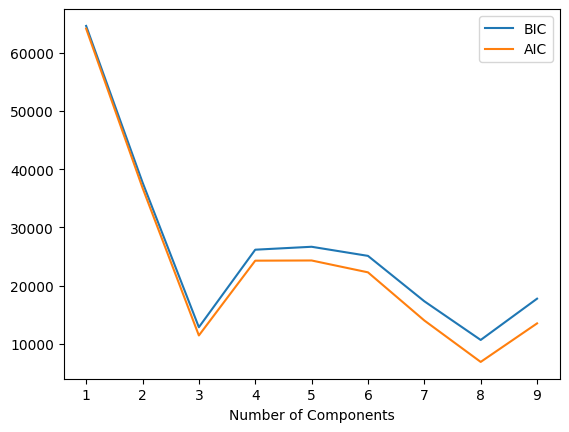

In [7]:
#Finding optimal number of clusters
#Prepare
n_components = np.arange(1,10)

#Create GMM Model
models = [GaussianMixture(n_components=n,
                          random_state=1502).fit(df) for n in n_components]
#Plot
plt.plot(n_components,
         [m.bic(df) for m in models],
         label = 'BIC')
plt.plot(n_components,
         [m.aic(df) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('Number of Components')

In [8]:
#Gaussian Mixture Model
model = GaussianMixture(n_components = 3,
                        random_state = 1502).fit(df)

#Interpretation

In [10]:
#Predict the cluster for each customer
cluster = pd.Series(model.predict(df))
cluster[:2]

0    2
1    2
dtype: int64

In [11]:
#Create Cluster variable
df['cluster'] = cluster
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,cluster
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0,2
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0,2


In [12]:
#Check how many people per cluster
df.cluster.value_counts()

2    720
1    303
0    296
Name: cluster, dtype: int64

In [14]:
#Interpretation
pd.DataFrame(model.means_,
             columns = list(df.iloc[:,:-1].columns))

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
1,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921
2,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000


In [ ]:
#Names
#Cluster 0: Non-Credit users
#Cluster 1: Succesful Enterpreneurs
#Cluster 2: young employees

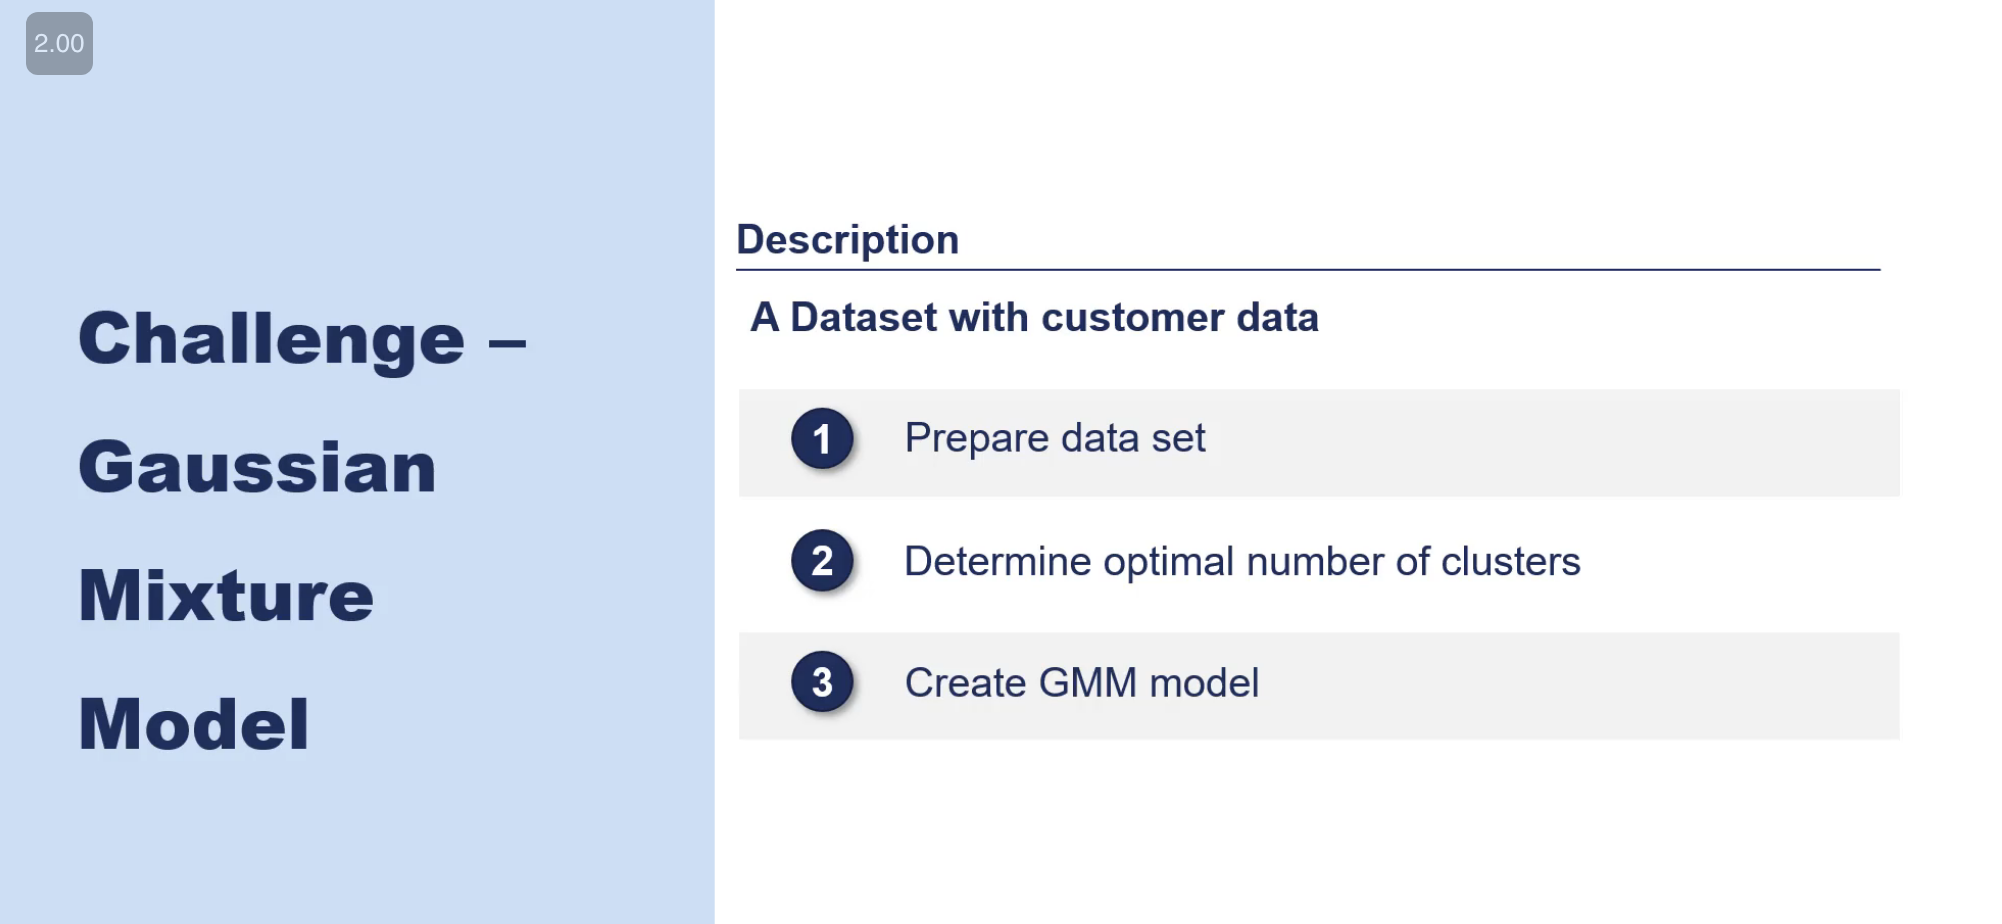

# Directory , libraries and Data

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [7]:
%cd /content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model

/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model


In [9]:
#load the data
df = pd.read_csv("CC GENERAL.csv").dropna()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


#Gaussian Mixture Model



In [10]:
#Creating DF wihtout CustomerID
data = df.iloc[:,1:]
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Text(0.5, 0, 'number of components')

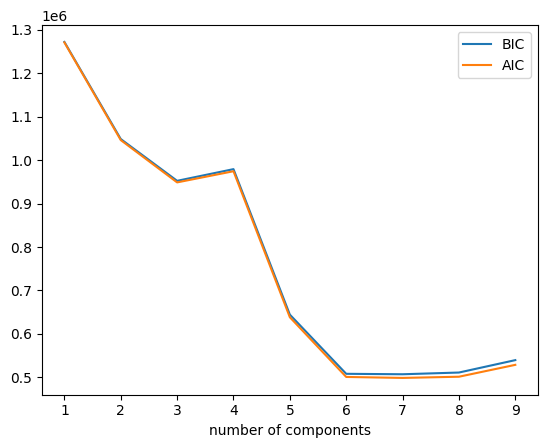

In [15]:
#Finding Optimal Number of clusters
n_components = np.arange(1,10)

#Model loop
models = [GaussianMixture(n_components = n,
                          random_state=1502).fit(data) for n in n_components]
#Plotting
plt.plot(n_components,
         [m.bic(data) for m in models],
          label = 'BIC')
plt.plot(n_components,
         [m.aic(data) for m in models],
          label = 'AIC')
plt.legend()
plt.xlabel('number of components')

In [18]:
#Gaussian Mixture Model
model = GaussianMixture(n_components = 6,
                        random_state = 1502).fit(data)

#Interpretation

In [17]:
#Predicition
cluster = pd.Series(model.predict(data))
df['Cluster'] = cluster
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0


In [19]:
#how many people per cluster
df.Cluster.value_counts()

5.0    2499
3.0    1852
1.0    1613
4.0    1287
0.0     907
2.0     181
Name: Cluster, dtype: int64

In [20]:
#Interpretation
pd.DataFrame(model.means_,
             columns = list(df.iloc[:,1:-1].columns))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1443.069999,0.885712,1108.231253,749.030320,359.200933,1912.197808,0.564574,0.277613,0.372164,0.266222,6.157609,15.438683,4237.825014,2567.713418,652.745666,0.142087,10.708183
1,161.868025,0.643264,678.050213,357.186392,320.863821,0.000000,0.521176,0.141998,0.382344,0.000000,0.000000,9.012351,3772.228386,893.737061,140.270580,0.329065,11.117165
2,4374.257633,0.932538,7049.730361,4396.430797,2667.777590,4021.659204,0.672596,0.357330,0.566279,0.248654,12.748488,61.516992,9399.238725,11024.729060,5686.644850,0.181780,11.571574
3,2181.706303,0.901941,0.000000,0.000000,0.000000,1987.796959,0.000000,0.000000,0.000000,0.277168,6.250398,0.000000,4038.595821,1670.740064,737.076566,0.046143,11.347262
4,3266.592086,1.000000,956.396858,552.589811,403.807047,1673.390738,0.569121,0.250655,0.412494,0.270243,6.356238,16.981572,5320.959438,1684.526780,2045.804681,0.000000,12.000000
5,1099.689773,1.000000,1585.495757,917.505929,667.989828,0.000000,0.772287,0.340255,0.595735,0.000000,0.000000,25.612400,4706.339977,1552.137440,545.839765,0.220209,12.000000


In [ ]:
#Name the Segments
#Cluster 0: Lower Middle Class
#Cluster 1: Inactive
#Cluster 2: High Rollers
#Cluster 3: Conscious high Income
#Cluster 4: Upper middle Class
#Cluster 5: Active purchasers